# Predicting Costumer that will leave the Bank

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [15]:
ann_data = pd.read_csv("Churn_modelling.csv")
ann_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
ann_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
ann_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
ann = ann_data.copy()#DeepCopy

## Visualization

C:\Users\Samyak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Samyak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


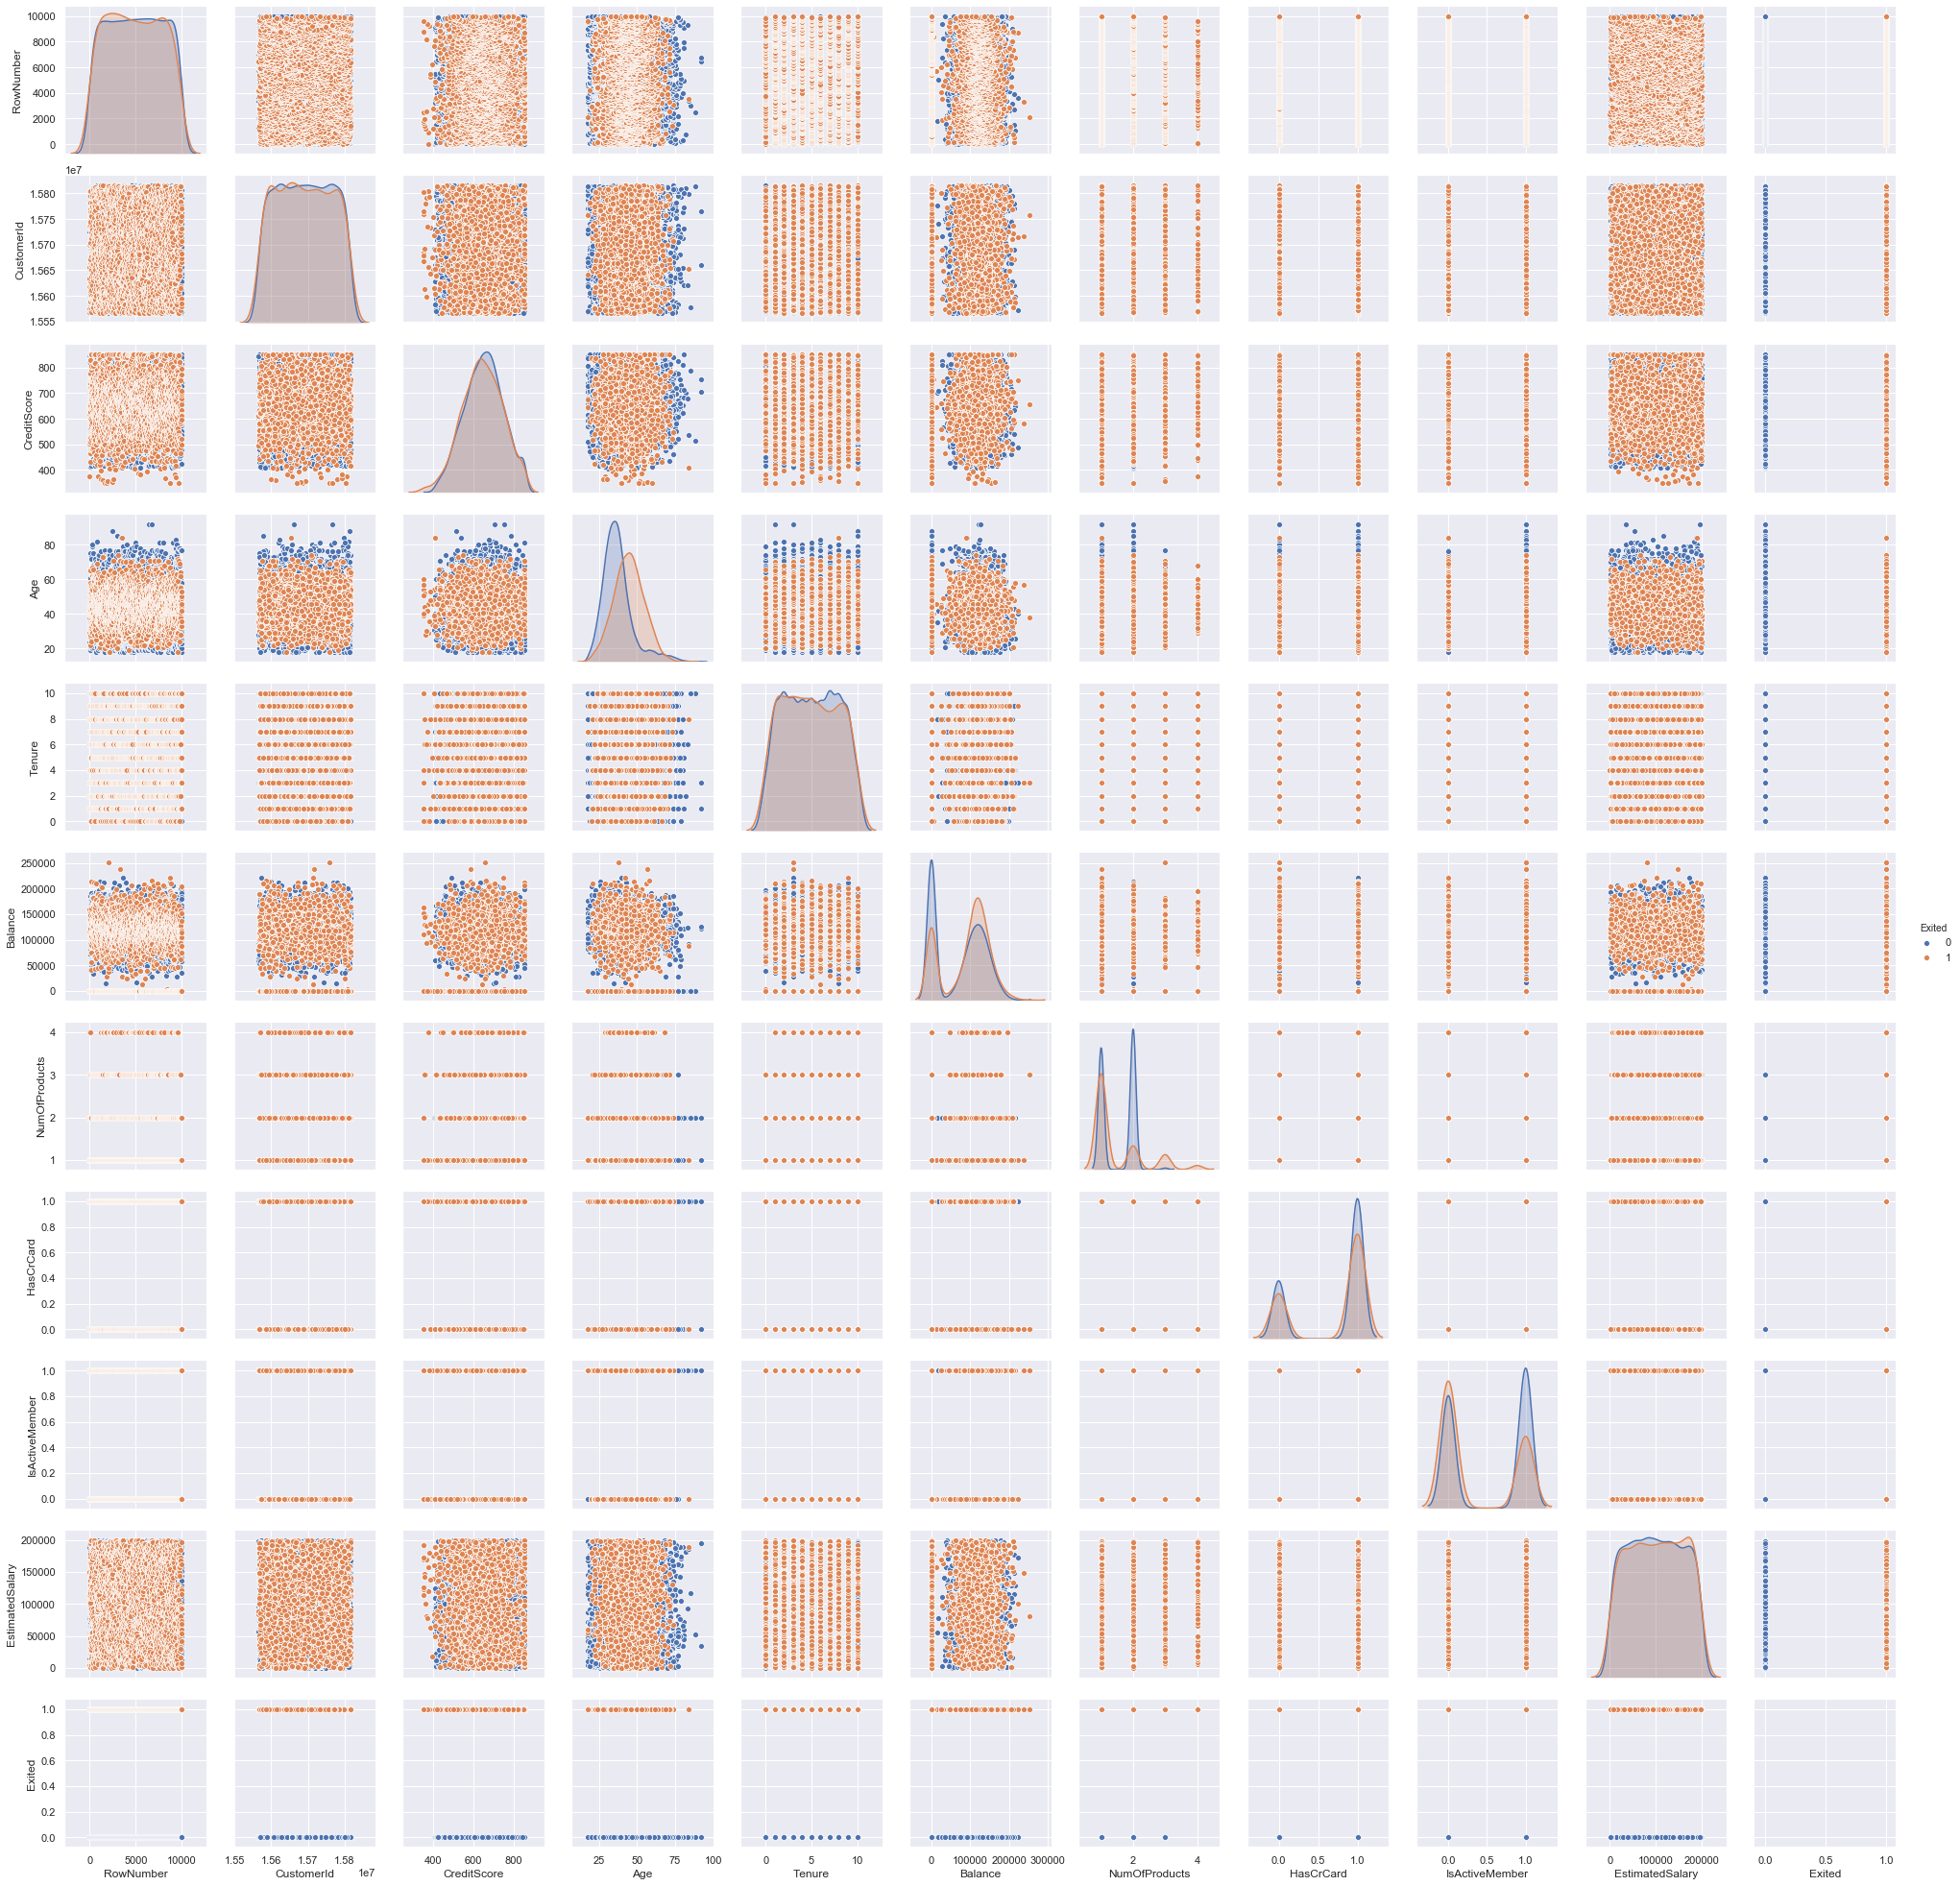

In [22]:
sns.pairplot(data = ann, hue = "Exited")

In [19]:
sns.set(rc = {"figure.figsize": (8, 6)})

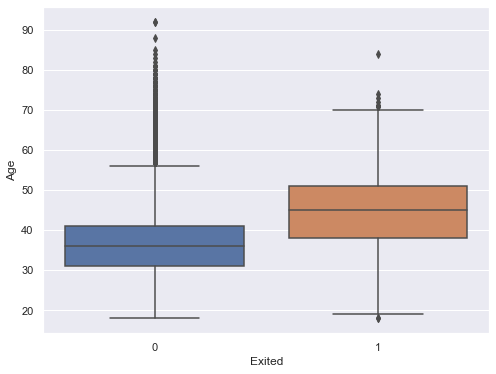

In [20]:
sns.boxplot(x="Exited", y="Age", data=ann)

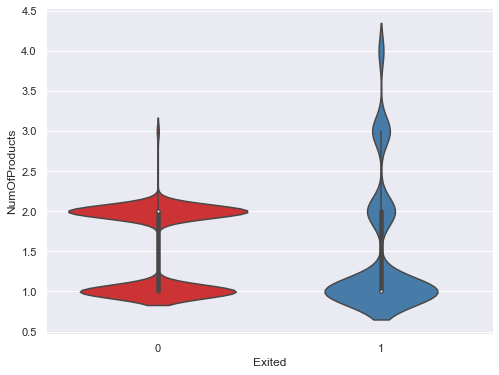

In [21]:
sns.violinplot(x="Exited", y="NumOfProducts", data=ann, palette="Set1")

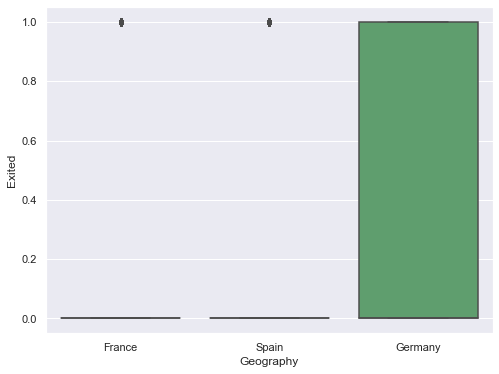

In [22]:
sns.boxplot(x="Geography", y="Exited", data=ann)

## Correlation

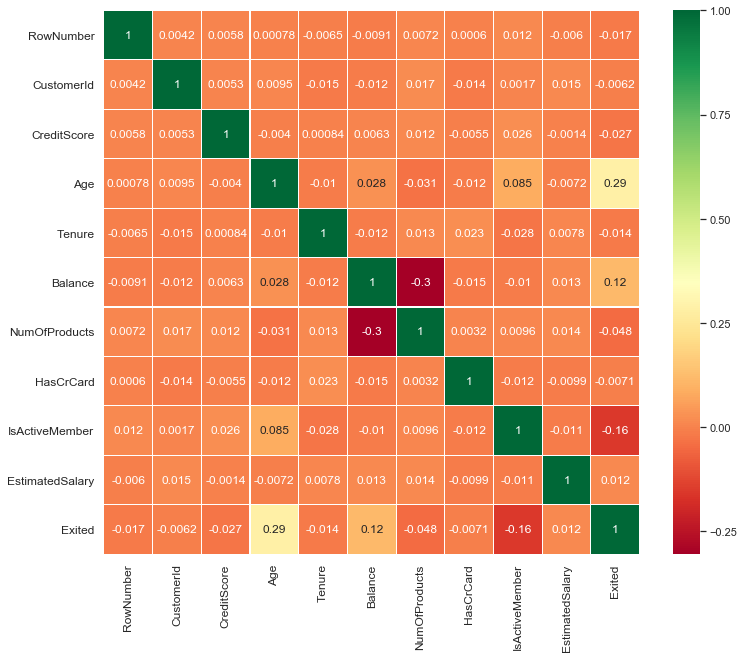

In [23]:
corr = ann.corr()
ax = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.1,annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Encoding Categorical Data

In [24]:
"""from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

label_encoder_x_1 = LabelEncoder()
X[: , 2] = label_encoder_x_1.fit_transform(X[:,2])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [1]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X.astype('float64')"""
#============================#
ann1 = pd.get_dummies(ann) 

## Input and Output variable

In [25]:
X = ann1.iloc[:, 3:13].values
y = ann1.iloc[:, 13].values
X, y

(array([[4.2000000e+01, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [4.1000000e+01, 1.0000000e+00, 8.3807860e+04, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [4.2000000e+01, 8.0000000e+00, 1.5966080e+05, ..., 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [3.6000000e+01, 7.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [4.2000000e+01, 3.0000000e+00, 7.5075310e+04, ..., 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [2.8000000e+01, 4.0000000e+00, 1.3014279e+05, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

## Spliting

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## PreProcessing

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the Neural Network

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [29]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 200)




Epoch 1/200





8000/8000 [==============================] - 3s 325us/step - loss: 0.1941 - acc: 0.9985
Epoch 2/200
8000/8000 [==============================] - 1s 118us/step - loss: 0.0059 - acc: 0.9995
Epoch 3/200
8000/8000 [==============================] - 1s 109us/step - loss: 0.0045 - acc: 0.9995
Epoch 4/200
8000/8000 [==============================] - 1s 118us/step - loss: 0.0043 - acc: 0.9995
Epoch 5/200
8000/8000 [==============================] - 1s 125us/step - loss: 0.0042 - acc: 0.9995
Epoch 6/200
8000/8000 [==============================] - 1s 170us/step - loss: 0.0040 - acc: 0.9995
Epoch 7/200
8000/8000 [==============================] - 2s 230us/step - loss: 0.0039 - acc: 0.9995
Epoch 8/200
8000/8000 [==============================] - 2s 230us/step - loss: 0.0039 - acc: 0.9995
Epoch 9/200
8000/8000 [==============================] - 2s 227us/step - loss: 0.0038 - acc: 0.9995
Epoch 10/200
8000/8000 [==============================] - 2s 236us/step - loss: 0.0037 - acc

8000/8000 [==============================] - 2s 247us/step - loss: 0.0011 - acc: 0.9995
Epoch 67/200
8000/8000 [==============================] - 2s 234us/step - loss: 0.0011 - acc: 0.9995
Epoch 68/200
8000/8000 [==============================] - 2s 229us/step - loss: 0.0012 - acc: 0.9995
Epoch 69/200
8000/8000 [==============================] - 2s 237us/step - loss: 0.0012 - acc: 0.9995
Epoch 70/200
8000/8000 [==============================] - 2s 236us/step - loss: 0.0010 - acc: 0.9995
Epoch 71/200
8000/8000 [==============================] - 2s 225us/step - loss: 9.5436e-04 - acc: 0.9995
Epoch 72/200
8000/8000 [==============================] - 2s 223us/step - loss: 0.0011 - acc: 0.9995
Epoch 73/200
8000/8000 [==============================] - 2s 223us/step - loss: 0.0011 - acc: 0.9995
Epoch 74/200
8000/8000 [==============================] - 2s 228us/step - loss: 0.0011 - acc: 0.9995
Epoch 75/200
8000/8000 [==============================] - 2s 228us/step - loss: 0.0011 - acc: 0.9995

8000/8000 [==============================] - 2s 233us/step - loss: 8.6574e-04 - acc: 0.9996
Epoch 146/200
8000/8000 [==============================] - 2s 239us/step - loss: 8.2667e-04 - acc: 0.9996
Epoch 147/200
8000/8000 [==============================] - 2s 250us/step - loss: 8.5593e-04 - acc: 0.9996
Epoch 148/200
8000/8000 [==============================] - 2s 246us/step - loss: 8.9396e-04 - acc: 0.9996
Epoch 149/200
8000/8000 [==============================] - 2s 251us/step - loss: 8.8699e-04 - acc: 0.9996
Epoch 150/200
8000/8000 [==============================] - 2s 234us/step - loss: 9.4296e-04 - acc: 0.9996
Epoch 151/200
8000/8000 [==============================] - 2s 232us/step - loss: 8.9581e-04 - acc: 0.9996
Epoch 152/200
8000/8000 [==============================] - 2s 230us/step - loss: 9.1870e-04 - acc: 0.9996
Epoch 153/200
8000/8000 [==============================] - 2s 232us/step - loss: 7.3409e-04 - acc: 0.9995
Epoch 154/200
8000/8000 [==============================] - 2

In [31]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2000]], dtype=int64)

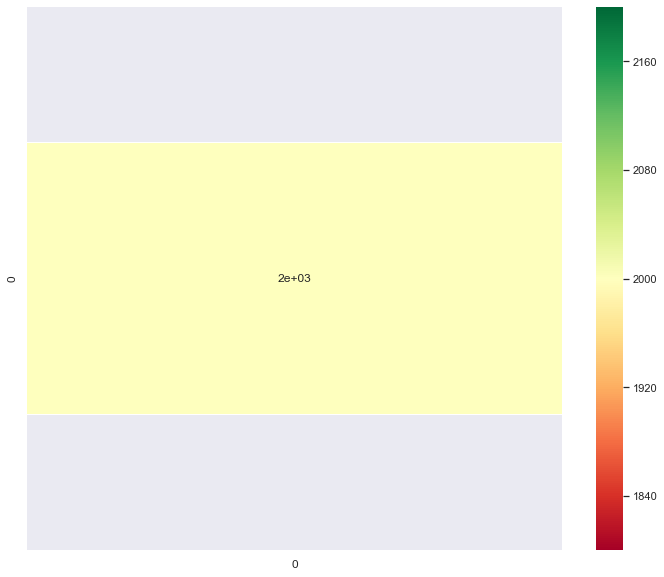

In [33]:
ax = sns.heatmap(cm,annot=True,cmap='RdYlGn',linewidths=0.1,annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### As you can see there are no missclassified samples in the Confusion Matrix. Therefor, the Accuracy Score = 0.1

In [34]:
print(f"Accuracy: {1*100}%")

Accuracy: 100%


#### Hence Accuracy of the model is 100% which is preety good